# Data Melting & Cleaning: Step by Step

1. Import Pandas library: this will help give my python code the tools to clean the dataset by using the pandas library

2. load the mutant_moneyball.csv file and print unclean file

3. perform a Dataframe melt, utilizing the same strategy as the in class assignment 6.1 

4. split the subject column into decade and platform

5. clean the value column, by removing unwanted characters (i.e , and $ )

6. (Note from talk with Prof. Smiley) Drop the redundant subject column. Again using methods from Pandas Cheat Sheet

7. display the cleaned version of df_melted

This final product illustrates the cleaned formatting illustrated in "Tidy Data Principles", namely by following the 3 main principles: 
 1. Each variable forms a column.
 2. Each observation forms a row.
 3. Each type of observational unit forms a table.

## 1. Import Pandas library: this will help give my python code the tools to clean the dataset by using the pandas library

In [56]:
## Data Melting & Cleaning

import pandas as pd


## 2. load the mutant_moneyball.csv file and print unclean file

In [57]:

# Load the data from the CSV file 
df = pd.read_csv('mutant_moneyball.csv')

# Display tidy DataFrame
print("Original (Untidy) DataFrame:")
print(df)


Original (Untidy) DataFrame:
                 Member  TotalValue60s_heritage  TotalValue70s_heritage  \
0     warrenWorthington                929056.0                154585.0   
1             hankMcCoy                929776.0                 20705.0   
2          scottSummers                933616.0                188635.0   
3            bobbyDrake                929776.0                154585.0   
4              jeanGrey                933616.0                179899.0   
5           alexSummers                 34519.0                144946.0   
6             lornaDane                 76279.0                144946.0   
7           ororoMunroe                     NaN                171050.0   
8            kurtWagner                     NaN                171050.0   
9          loganHowlett                     NaN                171050.0   
10        peterRasputin                     NaN                171050.0   
11          seanCassidy                 39200.0                171962.0

## 3. perform a Dataframe melt, utilizing the same strategy as the in class assignment 6.1 

In [58]:

# Melts the DataFrame. convert the columns TotalValue60s_heritage, TotalValue70s_heritage, etc
# into a single subject column, with their corresponding Value in a new 'Value' column.
df_melted = pd.melt(df, id_vars=['Member'], 
                    value_vars=[
                        'TotalValue60s_heritage', 'TotalValue70s_heritage', 'TotalValue80s_heritage', 'TotalValue90s_heritage',
                        'TotalValue60s_ebay', 'TotalValue70s_ebay', 'TotalValue80s_ebay', 'TotalValue90s_ebay',
                        'TotalValue60s_wiz', 'TotalValue70s_wiz', 'TotalValue80s_wiz', 'TotalValue90s_wiz',
                        'TotalValue60s_oStreet', 'TotalValue70s_oStreet', 'TotalValue80s_oStreet', 'TotalValue90s_oStreet'
                    ], 
                    var_name='Subject', 
                    value_name='Value')



## 4. split the subject column into decade and platform

In [59]:

# Split the subject column into decade and platform
df_melted[['Decade', 'Platform']] = df_melted['Subject'].str.split('_', expand=True)
df_melted['Decade'] = df_melted['Decade'].str.replace('TotalValue', '', regex=False)


## 5. clean the value column, by removing unwanted characters (i.e , and $ )

In [60]:

# Clean the  Valuecolumn by removing unwanted characters 
df_melted['Value'] = df_melted['Value'].replace({r'[$,]': ''}, regex=True)
df_melted['Value'] = pd.to_numeric(df_melted['Value'], errors='coerce')


## 6. (Note from talk with Prof. Smiley) Drop the redundant subject column. Again using methods from Pandas Cheat Sheet

In [61]:

# Drop the redundant 'Subject' column
df_melted = df_melted.drop(columns=['Subject'])


## 7. display the cleaned version of df_melted

In [62]:

# Display df_melted
print("\nMelted (Tidy) and Cleaned DataFrame:")
df_melted


Melted (Tidy) and Cleaned DataFrame:


,Member,Value,Decade,Platform
0,warrenWorthington,929056.0,60s,heritage
1,hankMcCoy,929776.0,60s,heritage
2,scottSummers,933616.0,60s,heritage
3,bobbyDrake,929776.0,60s,heritage
4,jeanGrey,933616.0,60s,heritage
...,...,...,...,...
411,remyLeBeau,188.0,90s,oStreet
412,jubilationLee,126.0,90s,oStreet
413,lucasBishop,80.0,90s,oStreet
414,betsyBraddock,109.0,90s,oStreet


# Part 2 Data VisualizationL: Step by Step

1. import matplotlib, seaborn and squarify. These will help me with the different visualizations I want to perform.

2. Box Plot: I used a logarithmic scale in order to make this better able to be visualized. This represents the value comics on different platforms.

3. Stacked Bar Chart using Pivot Table: Using a pivot table, based on the structure from the inclass assignment and the Pandas Cheat Sheet, this helps structure the data to better be visualized. Still problems because of the disparity of data among platforms, but it helps show the disparaties.

4. Tree Map Plot: After grouping the data for optimal visualization, I made a tree map. It was very interesting, although I want to find a way in the future to size the titles to be proportional with the boxes size.

5. Pie Chart: Following Professor's Smiley's idea to focus a visualization on a smaller portion of the data, I focused on the character Jean grey and the amount of comics on each of the different platforms.

6. Horizontal Bar Chart: Probably the most useful visualization, this shows the performances of the top most popular x-men.

7. Another Treemap: This shows the proportional popularity of certain characters. Still had the same problems as the last Tree Map.


Through these visualizations I recognize how important cleaning data is. Having an optimal dataset organization, whether that means pivotting it or cleaning it of different symbols allows me to make a lot more unique visualizations. While I still had some problems, I recognize that some of these dataset visualizations are a lot more insightful than my EDA from last year, as the cleaning and manipulation I learned from class, and the Pandas Cheat Sheet, allowed me to utilize the data in more interesting ways.




## 1. import matplotlib, seaborn and squarify. These will help me with the different visualizations I want to perform.

In [49]:
## Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
# Box Plot
#log Scale, helps better visualize the data



## 2. Box Plot: I used a logarithmic scale in order to make this better able to be visualized. This represents the value comics on different platforms.

C:\Users\john\AppData\Local\Temp\ipykernel_164\2221009899.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Platform', y='Value', data=df_melted, palette='Set2')


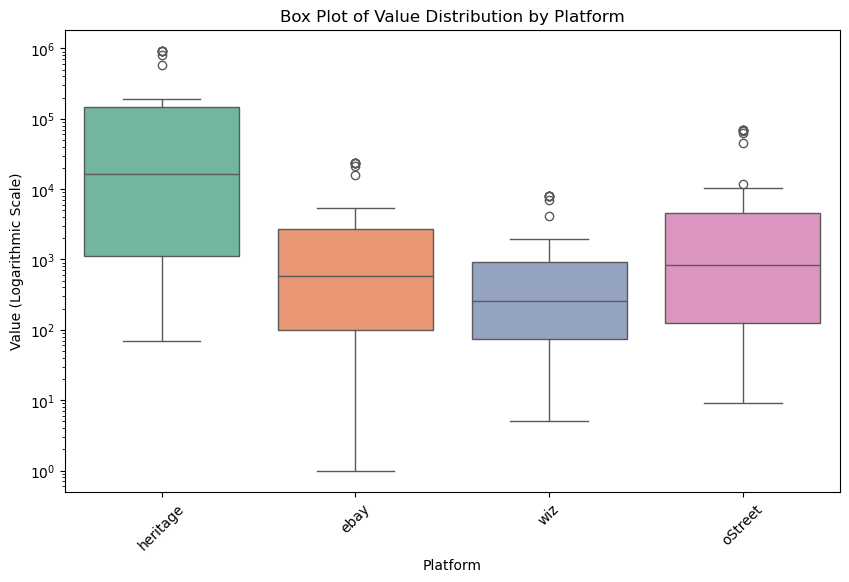

In [50]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Platform', y='Value', data=df_melted, palette='Set2')
plt.yscale('log')  
plt.xlabel('Platform')
plt.ylabel('Value (Logarithmic Scale)')
plt.title('Box Plot of Value Distribution by Platform')
plt.xticks(rotation=45)
plt.show()


## 3. Stacked Bar Chart using Pivot Table: Using a pivot table, based on the structure from the inclass assignment and the Pandas Cheat Sheet, this helps structure the data to better be visualized. Still problems because of the disparity of data among platforms, but it helps show the disparaties.

<Figure size 1000x600 with 0 Axes>

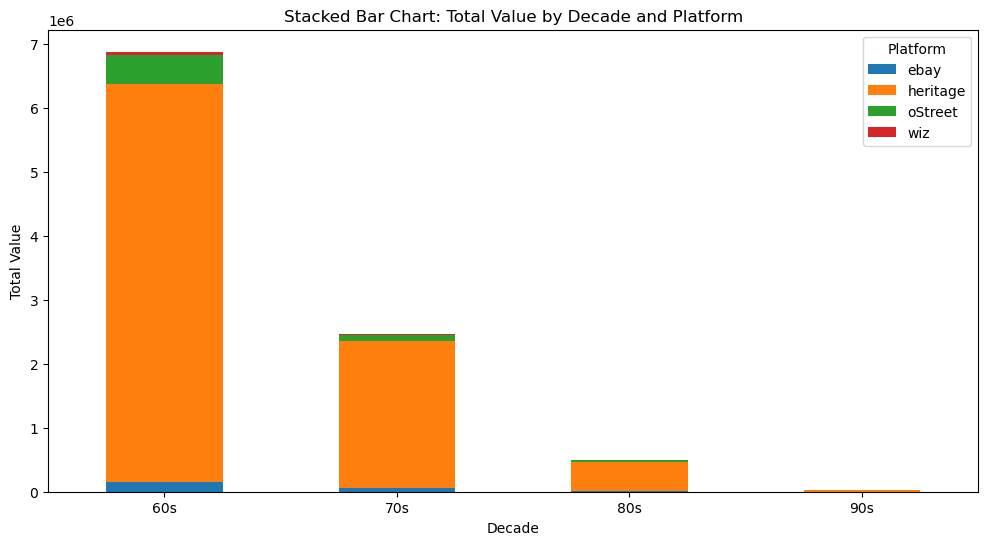

In [51]:

# Value by decade and platform, Stacked Bar chart
# Pivot Table Included
plt.figure(figsize=(10, 6))
df_pivot = df_melted.pivot_table(index='Decade', columns='Platform', values='Value', aggfunc='sum')

df_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Decade')
plt.ylabel('Total Value')
plt.title('Stacked Bar Chart: Total Value by Decade and Platform')
plt.legend(title='Platform')
plt.xticks(rotation=0)
plt.show()



## 4. Tree Map Plot: After grouping the data for optimal visualization, I made a tree map. It was very interesting, although I want to find a way in the future to size the titles to be proportional with the boxes size.

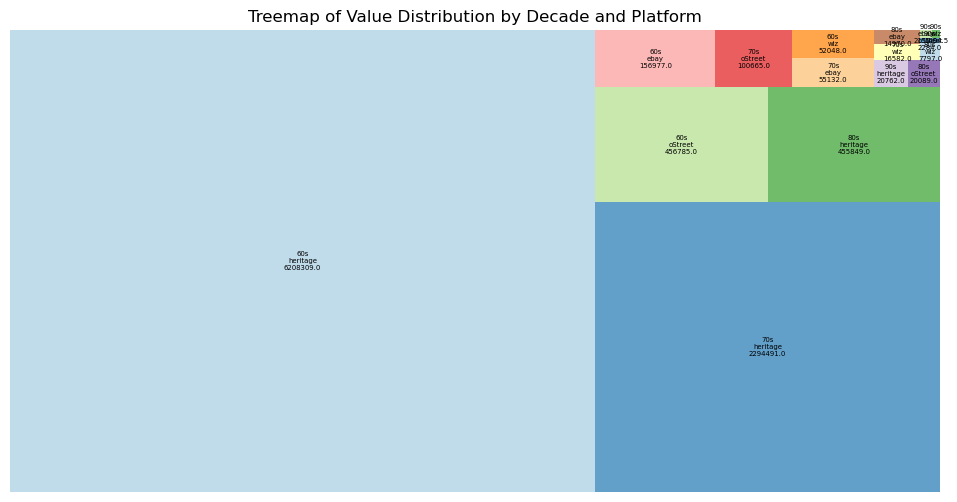

In [52]:


# Aggregate total value by Decade and Platform
df_grouped = df_melted.groupby(['Decade', 'Platform'])['Value'].sum().reset_index()

# Sort values for better visualization
df_grouped = df_grouped.sort_values('Value', ascending=False)

# Create labels for the treemap
df_grouped['Label'] = df_grouped['Decade'] + '\n' + df_grouped['Platform'] + '\n' + df_grouped['Value'].astype(str)

# Treemap plot
plt.figure(figsize=(12, 6))
squarify.plot(sizes=df_grouped['Value'], label=df_grouped['Label'], alpha=0.7, color=plt.cm.Paired.colors, text_kwargs={'fontsize': 5})
plt.axis('off')
plt.title('Treemap of Value Distribution by Decade and Platform')
plt.show()



## 5. Pie Chart: Following Professor's Smiley's idea to focus a visualization on a smaller portion of the data, I focused on the character Jean grey and the amount of comics on each of the different platforms.

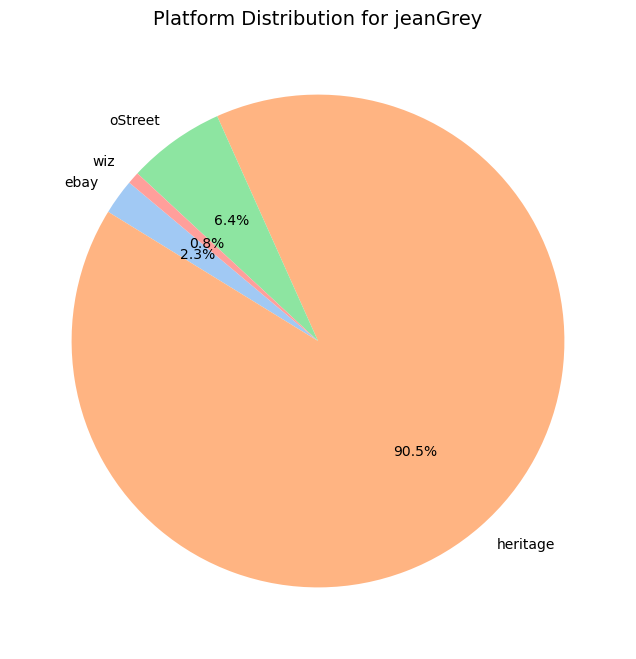

In [53]:

# Choose a character (Change 'Jean Grey' to another name if needed)
character = "jeanGrey"

# Filter data for the selected character
df_character = df_melted[df_melted['Member'] == character]



# Pie Chart: Proportion of Total Value from Different Platforms
plt.figure(figsize=(8, 8))
df_platform = df_character.groupby("Platform")["Value"].sum()
colors = sns.color_palette("pastel")
plt.pie(df_platform, labels=df_platform.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title(f"Platform Distribution for {character}", fontsize=14)
plt.show()




# 6. Horizontal Bar Chart: Probably the most useful visualization, this shows the performances of the top most popular x-men.

C:\Users\john\AppData\Local\Temp\ipykernel_164\685093087.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top, x="Value", y="Member", palette="coolwarm")


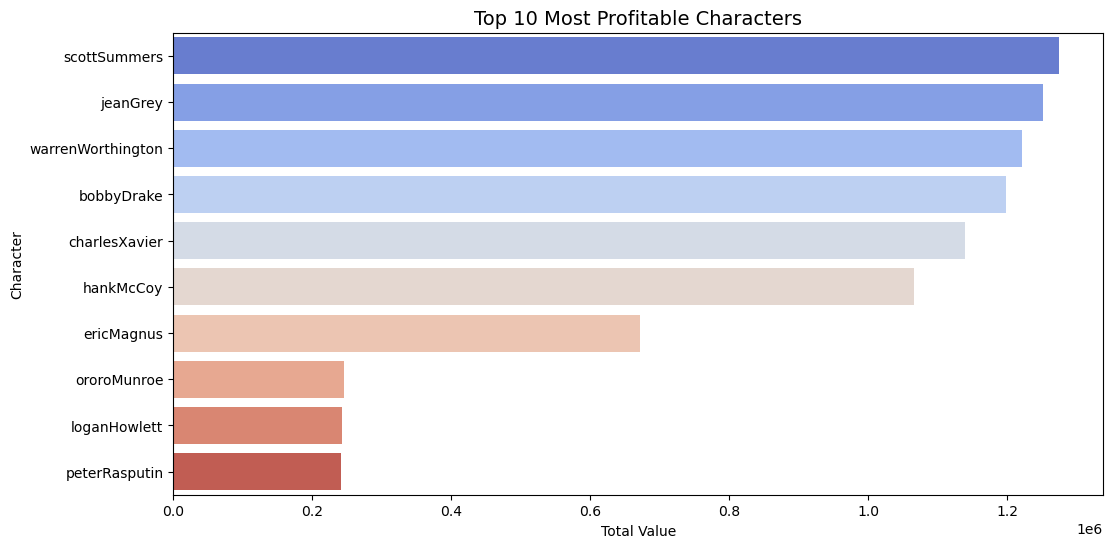

In [54]:


# add total value per character
df_profit = df_melted.groupby("Member")["Value"].sum().reset_index()

# Sort by total value  
df_profit = df_profit.sort_values(by="Value", ascending=False)

# Top 10 most profitable characters
top_n = 10
df_top = df_profit.head(top_n)

# Horizontal Bar Chart: Most Profitable Characters
plt.figure(figsize=(12, 6))
sns.barplot(data=df_top, x="Value", y="Member", palette="coolwarm")
plt.xlabel("Total Value")
plt.ylabel("Character")
plt.title(f"Top {top_n} Most Profitable Characters", fontsize=14)
plt.show()


## 7. Another Treemap: This shows the proportional popularity of certain characters. Still had the same problems as the last Tree Map.


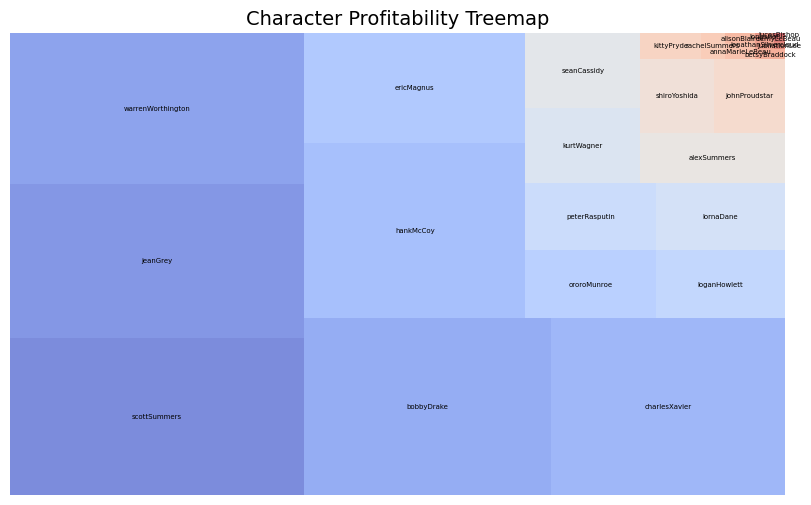

In [55]:

# Treemap: Proportional Success of Characters
plt.figure(figsize=(10, 6))
sizes = df_profit["Value"]
labels = df_profit["Member"]
colors = sns.color_palette("coolwarm", len(df_profit))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7,text_kwargs={'fontsize': 5})
plt.axis("off")
plt.title("Character Profitability Treemap", fontsize=14)
plt.show()